Import stuff

In [2]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from shapely.geometry import Polygon, Point 
import folium.colormap as cm

# Load crime records

Lode crime records for the city of Chicago

In [3]:
crimes = pd.read_pickle('crime_chicago_with_timestamp.pkl')

In [4]:
crimes.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,day,datetime
0,10361459,HY553232,12/28/2015 11:39:00 PM,025XX S STEWART AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,18,50629,72523,2015,01/04/2016 04:02:14 PM,41.845652,-87.636561,"(41.845652363, -87.636561415)",12/28/2015,2015-12-28


# Count crimes at each location

Group by "Location" and count occurences of each specific coordinates in the dataset:

In [5]:
loc_count = crimes[['Location']].groupby(['Location']).size().reset_index().rename(columns={0:'count'})

Sort:

In [6]:
loc_count.sort_values(by='count', ascending=False).head(10)

,Location,count
359054,"(41.75464162, -87.741385158)",4031
359159,"(41.754658085, -87.741385006)",3817
1071320,"(41.883559699, -87.627736496)",2618
1174100,"(41.897765295, -87.623958464)",2108
1231363,"(41.904481394, -87.647148303)",1803
1271971,"(41.909763298, -87.743312036)",1542
1165408,"(41.896757773, -87.628351553)",1401
767064,"(41.813762321, -87.628194958)",1372
64869,"(41.689908902, -87.637607596)",1326
119982,"(41.705862453, -87.653787153)",1316


The table shows that some specific coordinates occur extremely often (several thousands times). This might suggest they are some sort of default coordinates for entries with unknown location. Further investigation shows otherwise.

count    1776737.000000
mean           3.290690
std           12.512859
min            1.000000
25%            1.000000
50%            1.000000
75%            3.000000
max         4031.000000
Name: count, dtype: float64

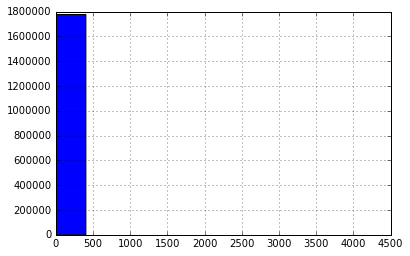

In [7]:
loc_count['count'].hist(),
loc_count['count'].describe()

Histogram and statistics above show that there is very few locations with such extreme number of crimes. More than a half of the coordinates occur only once in entire dataset and more than 75% of the coordinates occur no more than three times.

# Investigate crimes at specific location

In [12]:
loc = '(41.75464162, -87.741385158)' #location of interest
col = 'Location Description' #column

Crimes at location loc (the most frequent one), grouped by the location description:

In [13]:
crimes[crimes['Location'] == loc][[col]].groupby([col]).size().reset_index().sort_values(by=0, ascending=False)

,Location Description,0
16,DEPARTMENT STORE,2125
26,PARKING LOT/GARAGE(NON.RESID.),638
33,SMALL RETAIL STORE,617
23,OTHER,358
29,RESTAURANT,81
22,MOVIE HOUSE/THEATER,58
34,STREET,43
36,VEHICLE NON-COMMERCIAL,26
32,SIDEWALK,16
7,COMMERCIAL / BUSINESS OFFICE,14


The table above contains descriptions of locations of crimes with number of ocurences for the most frequent geographical location within the dataset. By Google Maps, the geographical location is right next to a big shopping mall. The three most common location descriptions are DEPARTMENT STORE, PARKING LOT/GARAGE(NON.RESID.), and SMALL RETAIL STORE. Vast majority of crimes happened in these. This suggest that the coordinates are not default but rather they refer to the shopping mall as the locations are very typical for this.



All crimes from the entire city grouped by location description:

In [14]:
crimes[[col]].groupby([col]).size().reset_index().sort_values(by=0, ascending=False)

,Location Description,0
148,STREET,1574587
128,RESIDENCE,987361
144,SIDEWALK,593771
17,APARTMENT,587477
114,OTHER,217665
119,PARKING LOT/GARAGE(NON.RESID.),165787
15,ALLEY,133935
141,"SCHOOL, PUBLIC, BUILDING",131118
130,RESIDENCE-GARAGE,116947
129,RESIDENCE PORCH/HALLWAY,102924


The table above shows that the shopping mall locations are not at all typical for entire dataset what strenghtens the conclusion that the suspicious coordinates refer to entire shopping mall.

### Daily numbers of crimes of certain type (THEFT)

For the location loc (the most frequent one):

In [15]:
tp = 'THEFT' #type of crime
loc_thefts_daily = crimes[(crimes['Location'] == loc) & (crimes['Primary Type'] == tp)][['datetime']].groupby(['datetime']).size().reset_index().rename(columns={0:'count'})
loc_thefts_daily.sort_values(by='count', ascending=False)

,datetime,count
174,2005-09-16,7
964,2008-10-18,6
126,2005-07-19,6
695,2007-11-10,6
1258,2009-12-12,6
1248,2009-11-28,6
1174,2009-08-05,6
520,2007-01-19,5
170,2005-09-12,5
217,2005-11-10,5


There is at most a few thefts in the shopping mall every day.

count    1669.000000
mean        1.739365
std         0.942477
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: count, dtype: float64

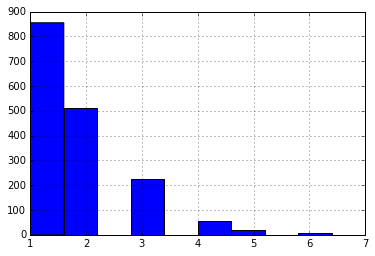

In [16]:
loc_thefts_daily['count'].hist(),
loc_thefts_daily['count'].describe()

For the entire city:

In [17]:
thefts_daily = crimes[crimes['Primary Type'] == tp][['datetime']].groupby(['datetime']).size().reset_index().rename(columns={0:'count'})
thefts_daily.sort_values(by='count', ascending=False)

,datetime,count
2191,2007-01-01,453
273,2001-10-01,417
942,2003-08-01,410
0,2001-01-01,400
638,2002-10-01,399
1291,2004-07-15,399
1003,2003-10-01,398
212,2001-08-01,397
151,2001-06-01,393
560,2002-07-15,391


In the entire city of Chicago there has been at least 58 thefts every single day (with the maximum of 453 thefts per day). The thefts at the shopping mall are quite reasonable fraction of this.

count    5475.000000
mean      219.603288
std        49.947646
min        58.000000
25%       185.000000
50%       219.000000
75%       252.000000
max       453.000000
Name: count, dtype: float64

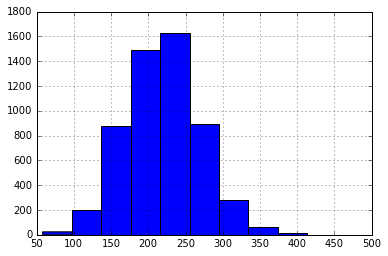

In [18]:
thefts_daily['count'].hist(),
thefts_daily['count'].describe()